In [1]:

def z_factor(product1,product2):
    z=1
    y=1
    factor=1000
    if product1=='RB' and product2 =='RB':
        z=42
        y=42
    elif product1=='HO' and product2 =='HO':
        z=42
        y=42
    elif product1=='RB' and product2 =='HO':
        z=42
        y=42
    elif product1=='HO' and product2 =='RB':
        z=42
        y=42
    elif product1=='G' and product2 =='G':
        factor=100
    elif product1=='G' and product2 =='B':
        z=(1/7.45)
    elif product1=="HO" and product2=='G':
        z=1
        y=1
    
    else:
        z=1
        y=1
        factor=1000
    
    return z,y, factor
        
def create_sprd(dataframe1, dataframe2):
   
    dataframe1.reset_index(inplace=True)
    dataframe2.reset_index(inplace=True)
    date=dataframe1['Date']
    
    dataframe1.drop(columns=['Date'],inplace=True)
    dataframe2.drop(columns=['Date'],inplace=True)
    
    while True:
        sprd_type=int(raw_input('Please indicate if this is a 1) Crack or 2) Spread 3) HOGO Sprd - please input integer 1,2, or 3: '))
        
        if sprd_type==1:
            
            new_df=dataframe1*42-dataframe2
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            new_df.fillna(method='ffill',inplace=True)
            new_df.fillna(method='bfill',inplace=True)
            
            return new_df
            break
        
        elif sprd_type==2:
            
            new_df= dataframe1-dataframe2
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            new_df.fillna(method='ffill',inplace=True)
            new_df.fillna(method='bfill',inplace=True)
            
            return new_df
            break
        
        elif sprd_type==3:
            
            new_df=dataframe1*42-dataframe2/7.45
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            new_df.fillna(method='ffill',inplace=True)
            new_df.fillna(method='bfill',inplace=True)
            
            return new_df
            break
        
        else:
            print 'You have inputted incorrectly. Please try again and enter either integer 1,2, or 3.'
    

class Mth_1(object):
    
    def __init__(self):
        pass
        
    def pdt_type1(self):
        
        product=''
        while True:
            inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
            if inst==1:
                product='B'
                break
            elif inst==2:
                product='G'
                break   
            elif inst==3:
                product='HO'
                break      
            elif inst==4:
                product='RB'
                break       
            elif inst==5:
                product='CL'
                break       
            else:
                print 'You did not input a correct number. Please try again.'
        
        return product
        
    
    def mth_no1(self):
        month=''
        while True:
            Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
            if Mth==1:
                month='Jan'
                break
            elif Mth==2:
                month='Feb'
                break   
            elif Mth==3:
                month='Mar'
                break   
            elif Mth==4:
                month='Apr'
                break   
            elif Mth==5:
                month='May'
                break          
            elif Mth==6:
                month='Jun'
                break   
            elif Mth==7:
                month='Jul'
                break   
            elif Mth==8:
                month='Aug'
                break   
            elif Mth==9:
                month='Sep'
                break   
            elif Mth==10:
                month='Oct'
                break   
            elif Mth==11:
                month='Nov'
                break   
            elif Mth==12:
                month='Dec'
                break 
            else:
                print 'You did not input a correct number. Please try again.'
        
        return month

    def dataframe_create(self,start_mth,start_day,end_mth,end_day,i,j):

        count=0
        path = os.getcwd()
        
        listing = os.listdir(path)
    
        for infile in listing:
            temp=pd.read_excel(infile) #read each file into panda dataframe
    
            contract_yr_str=infile[-8:-4] # get the contract year
    
            seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
            seasonal_year=str(seasonal_year) # convert to string

            start_date=str(int(seasonal_year)+i)+'-'+start_mth+'-'+start_day # create start date
            end_date=str(int(seasonal_year)+j)+'-'+end_mth+'-'+end_day # create end date
            
            #Join a date dataframe and the temp dataframe together
            
            dates=pd.date_range(start_date, end_date) # range of dates for date axis
            dates=dates.strftime('%Y-%m-%d') #make sure no left out dates
            sample_data=np.arange(0,len(dates)) #just sample numbers to create dataframe
    
            dates_dataframe=pd.DataFrame({'Date':dates,'data':sample_data}) # create dates dataframe
            dates_dataframe=dates_dataframe.set_index('Date') # set index as Date to facilitate joining
    
            temp=temp.set_index('Date') # set index as Date to facilitate joining
    
            temp=dates_dataframe.join(temp) # join dataframes together on Date
               
            #filter dates by the start and end date
            temp.reset_index(inplace=True)
    
            temp=temp[temp['Date']>=start_date] # filter for start date

            temp=temp[temp['Date']<=end_date] # filter for end date

            temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d') # putting date in mm/dd form
            temp=temp.set_index('Date') # putting date back as index
            temp=pd.DataFrame(temp['Settle'],columns=['Settle']) # setting dataframe with date and settle only

    
            if count==0:
                Seasonal_Combi=temp
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)
        
                count+=1
        
            else:
    
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi['Settle']=temp['Settle']
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)

        #don't need this, i believe
        #Seasonal_Combi.drop(columns=['Open','High','Low','Last','Change', 'Volume','Prev. Day Open Interest'],inplace=True)   

        
        return Seasonal_Combi
            
            

class Mth_2(object):
    
    def __init__(self):
        pass
        
    def pdt_type2(self):
        
        product=''
        while True:
            inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
            if inst==1:
                product='B'
                break
            elif inst==2:
                product='G'
                break   
            elif inst==3:
                product='HO'
                break      
            elif inst==4:
                product='RB'
                break       
            elif inst==5:
                product='CL'
                break       
            else:
                print 'You did not input a correct number. Please try again.'
        
        return product
        
    
    def mth_no2(self):
        month=''
        while True:
            Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
            if Mth==1:
                month='Jan'
                break
            elif Mth==2:
                month='Feb'
                break   
            elif Mth==3:
                month='Mar'
                break   
            elif Mth==4:
                month='Apr'
                break   
            elif Mth==5:
                month='May'
                break          
            elif Mth==6:
                month='Jun'
                break   
            elif Mth==7:
                month='Jul'
                break   
            elif Mth==8:
                month='Aug'
                break   
            elif Mth==9:
                month='Sep'
                break   
            elif Mth==10:
                month='Oct'
                break   
            elif Mth==11:
                month='Nov'
                break   
            elif Mth==12:
                month='Dec'
                break 
            else:
                print 'You did not input a correct number. Please try again.'
        
        return month

    def dataframe_create(self, start_mth, start_day, end_mth,end_day,i,j):

        count=0
        path = os.getcwd()

        listing = os.listdir(path)
        for infile in listing:
            temp=pd.read_excel(infile) #read each file into panda dataframe
    
            contract_yr_str=infile[-8:-4] # get the contract year
    
            seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
            seasonal_year=str(seasonal_year) # convert to string
     
            start_date=str(int(seasonal_year)+i)+'-'+start_mth+'-'+start_day # create start date
            end_date=str(int(seasonal_year)+j)+'-'+end_mth+'-'+end_day # create end date
            
            #Join a date dataframe and the temp dataframe together
            
            dates=pd.date_range(start_date, end_date) # range of dates for date axis
            dates=dates.strftime('%Y-%m-%d') #make sure no left out dates
            sample_data=np.arange(0,len(dates)) #just sample numbers to create dataframe
    
            dates_dataframe=pd.DataFrame({'Date':dates,'data':sample_data}) # create dates dataframe
            dates_dataframe=dates_dataframe.set_index('Date') # set index as Date to facilitate joining
    
            temp=temp.set_index('Date') # set index as Date to facilitate joining
    
            temp=dates_dataframe.join(temp) # join dataframes together on Date
               
            #filter dates by the start and end date
            temp.reset_index(inplace=True)
    
            temp=temp[temp['Date']>=start_date] # filter for start date

            temp=temp[temp['Date']<=end_date] # filter for end date

            temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d') # putting date in mm/dd form
            temp=temp.set_index('Date') # putting date back as index
            temp=pd.DataFrame(temp['Settle'],columns=['Settle']) # setting dataframe with date and settle only
    
            if count==0:
                Seasonal_Combi=temp
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)
        
                count+=1
        
            else:
    
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi['Settle']=temp['Settle']
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)

        #Seasonal_Combi.drop(columns=['Open','High','Low','Last','Change','Volume','Prev. Day Open Interest'],inplace=True)   

        
        return Seasonal_Combi
    

        
    
import numpy as np
import pandas as pd
import os
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt  
%matplotlib inline

#user specify instrument and contract month

product1=''
month1=''
product2=''
month2=''

front_mth=Mth_1()
product1 = front_mth.pdt_type1()
month1=front_mth.mth_no1()

back_mth=Mth_2()
product2=back_mth.pdt_type2()
month2=back_mth.mth_no2()

        

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 4
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 7
Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 3
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 7


In [2]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [3]:
cd $product1

C:\Users\boonsin.teo\Documents\Quandl\RB


In [4]:
cd $month1

C:\Users\boonsin.teo\Documents\Quandl\RB\Jul


In [5]:
start_mth=raw_input('Please input start mth of seasonal period in MM format: ')
start_day=raw_input('Please input start day of seasonal period in DD format: ')
i=int(raw_input('Please input 1 if start mth is the same as contract year and 0 if not: '))
            
end_mth=raw_input('Please input end mth of seasonal period in MM format: ')
end_day=raw_input('Please input end day of seasonal period in DD format: ')
            
j=int(raw_input('Please input 1 if end mth is the same as contract year and 0 if not: '))


front_month=front_mth.dataframe_create(start_mth,start_day,end_mth,end_day,i,j)

Please input start mth of seasonal period in MM format: 01
Please input start day of seasonal period in DD format: 01
Please input 1 if start mth is the same as contract year and 0 if not: 1
Please input end mth of seasonal period in MM format: 05
Please input end day of seasonal period in DD format: 25
Please input 1 if end mth is the same as contract year and 0 if not: 1


In [6]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\RB


In [7]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [8]:
cd ..

C:\Users\boonsin.teo\Documents


In [9]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [10]:
cd $product2

C:\Users\boonsin.teo\Documents\Quandl\HO


In [11]:
cd $month2

C:\Users\boonsin.teo\Documents\Quandl\HO\Jul


In [12]:
back_month=back_mth.dataframe_create(start_mth, start_day,end_mth,end_day,i,j)

In [13]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\HO


In [14]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [15]:
cd ..

C:\Users\boonsin.teo\Documents


In [16]:
front_month.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Date,,,,,,,,,,,,,,,,,,,,,
01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/02,0.5610,0.6766,0.5581,NaN,NaN,0.7926,0.6695,0.8485,NaN,NaN,...,1.3725,NaN,NaN,NaN,2.8408,2.8244,1.7086,NaN,NaN,1.9580
01/03,0.5605,0.6743,NaN,NaN,NaN,0.8031,0.6610,0.8710,NaN,1.2065,...,NaN,NaN,2.5250,2.8142,2.8422,2.7833,NaN,NaN,1.8139,1.9914
01/04,0.5650,NaN,NaN,0.4355,0.6750,0.8095,0.6847,NaN,NaN,1.2465,...,NaN,2.2428,2.5111,2.8666,2.8317,NaN,NaN,1.5196,1.8338,1.9952
01/05,0.5697,NaN,0.5480,0.4265,0.6695,0.8087,NaN,NaN,0.9675,1.2375,...,1.4329,NaN,2.5416,2.8304,NaN,NaN,1.6550,1.4958,1.8304,1.9813


In [17]:
back_month.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Date,,,,,,,,,,,,,,,,,,,,,
01/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/02,0.4959,0.5977,0.5002,NaN,NaN,0.7014,0.5776,0.7145,NaN,NaN,...,1.5908,NaN,NaN,NaN,3.0195,2.9392,1.8052,NaN,NaN,1.9615
01/03,0.4916,0.5948,NaN,NaN,NaN,0.7091,0.5624,0.7224,NaN,1.1020,...,NaN,NaN,2.5644,2.9607,3.0018,2.8967,NaN,NaN,1.7214,1.9930
01/04,0.4943,NaN,NaN,0.3739,0.5728,0.7077,0.5885,NaN,NaN,1.1423,...,NaN,2.2106,2.5334,3.0224,2.9825,NaN,NaN,1.2366,1.7389,1.9919
01/05,0.4989,NaN,0.4898,0.3660,0.5647,0.7022,NaN,NaN,0.8085,1.1293,...,1.6733,2.2175,2.5660,2.9970,NaN,NaN,1.7476,1.2227,1.7404,1.9811


In [18]:
Spread_Combi=create_sprd(front_month, back_month)

Please indicate if this is a 1) Crack or 2) Spread 3) HOGO Sprd - please input integer 1,2, or 3: 2


In [19]:
Spread_Combi.dropna(axis=0,how='all',inplace=True) # drop rows with all NAs

In [20]:
Spread_Combi.dropna(axis=1,how='all',inplace=True)# drop columns with all NAs

In [21]:
lookback=int(raw_input('Please input the lookback period: '))
df_ma=Spread_Combi
df_std=Spread_Combi



Please input the lookback period: 20


In [22]:
df_ma=pd.rolling_mean(Spread_Combi,lookback)
df_std=pd.rolling_std(Spread_Combi,lookback)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).std()
  


In [23]:
z_score=(Spread_Combi-df_ma)/df_std

In [24]:
z_score_entry=float(raw_input('Please input the z score for trade entry as a positive float number: '))
z_score_exit=float(raw_input('Please input the z score for trade exit as a positive float number: '))

df_long_entry=z_score <= -z_score_entry
df_long_exit=z_score>=-z_score_exit
df_short_entry=z_score>=z_score_entry
df_short_exit=z_score<=z_score_exit

Please input the z score for trade entry as a positive float number: 2.1
Please input the z score for trade exit as a positive float number: 1


In [25]:
rows=Spread_Combi.shape[0]
cols=Spread_Combi.shape[1]

In [26]:
df_long_positions=pd.DataFrame(np.nan,index=range(0,rows),columns=range(0,cols))
df_short_positions=pd.DataFrame(np.nan,index=range(0,rows),columns=range(0,cols))

In [27]:
df_long_entry[df_long_entry==True]=2
df_long_exit[df_long_exit==True]=-1
df_long_positions=df_long_entry+df_long_exit

df_long_positions[df_long_positions==0]=np.nan
df_long_positions[df_long_positions==-1]=0
df_long_positions[df_long_positions==2]=1

df_long_positions=df_long_positions.fillna(method='ffill')

In [28]:
df_short_entry[df_short_entry==True]=-2
df_short_exit[df_short_exit==True]=1
df_short_positions=df_short_entry+df_short_exit

df_short_positions[df_short_positions==0]=np.nan
df_short_positions[df_short_positions==1]=0
df_short_positions[df_short_positions==-2]=-1

df_short_positions=df_short_positions.fillna(method='ffill')

C:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [29]:
df_positions=df_long_positions+df_short_positions

In [30]:
zf=z_factor(product1, product2)

In [31]:
df_pnl=df_positions.shift(1)*(Spread_Combi*zf[0]-Spread_Combi.shift(1)*zf[1])*zf[2]

In [32]:
df_cumpnl=df_pnl.cumsum()

In [33]:
final_pnl=df_cumpnl.tail(1)
final_pnl.sum()

1996    -134.4
1997    1083.6
1998     814.8
1999    1167.6
2000    -932.4
2001     172.2
2002     386.4
2003    1659.0
2004    1247.4
2005    2352.0
2006   -3015.6
2007   -2704.8
2008    1045.8
2009   -1890.0
2010    1108.8
2011    1113.0
2012   -3246.6
2013    4998.0
2014    -365.4
2015     903.0
2016     474.6
2017    1944.6
2018    2410.8
dtype: float64

In [34]:
win_percent=float(float((final_pnl[final_pnl>=0].count().sum()))/float((final_pnl.count().sum())))*100

In [35]:
print 'The winning percentage is %.2f percent.' %win_percent
print 'The sample size is %.0f.' %final_pnl.count().sum()

The winning percentage is 69.57 percent.
The sample size is 23.


In [36]:
print 'Total pnl over 23 years is $%.2f.'%final_pnl.sum().sum()

Total pnl over 23 years is $10592.40.


In [37]:
z_score_date=raw_input("Please input the date to check in mm/dd format: ")

Please input the date to check in mm/dd format: 05/11


In [38]:
z_score_year=raw_input('Please input the year of the date in which you are in: ')

Please input the year of the date in which you are in: 2018


In [39]:
if z_score[z_score_year].loc[z_score_date]<=-z_score_entry or z_score[z_score_year].loc[z_score_date]>=z_score_entry:
    print "Trade Entry Check!"
    print 'The z-score is %.2f.' %z_score[z_score_year].loc[z_score_date] 
else:
    print 'No entry signal. Please check for exit signal if already in the trade.'
    print 'The z-score is %.2f.' %z_score[z_score_year].loc[z_score_date] 

No entry signal. Please check for exit signal if already in the trade.
The z-score is -0.52.


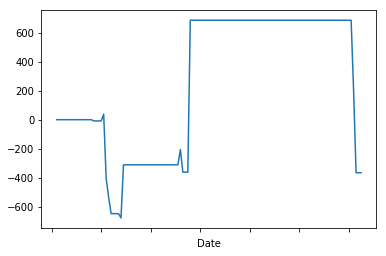

In [40]:
#to plot equity curve
df_cumpnl['2014'].plot()

In [41]:
df_cumpnl.min()

1996    -995.4
1997      46.2
1998      58.8
1999       0.0
2000   -2646.0
2001    -840.0
2002    -756.0
2003     -21.0
2004    -268.8
2005       0.0
2006   -6291.6
2007   -3465.0
2008   -7001.4
2009   -3893.4
2010    -231.0
2011   -3502.8
2012   -4641.0
2013   -1306.2
2014    -676.2
2015    -550.2
2016   -3439.8
2017       0.0
2018       0.0
dtype: float64

In [42]:
#adf calculation
adf=final_pnl

In [43]:
i=0
while i<cols:
    adf.iloc[:,i]=float(ts.adfuller(Spread_Combi.iloc[:,i])[0])
    i+=1

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [44]:
adf.sum()

1996   -1.209200
1997   -3.145482
1998   -0.583693
1999   -1.455654
2000   -0.663551
2001   -1.813369
2002   -2.451235
2003   -1.807803
2004    0.089389
2005   -1.323406
2006   -1.264588
2007    0.477947
2008   -0.025711
2009   -0.489925
2010   -1.854588
2011   -1.609256
2012   -1.680452
2013   -2.388802
2014   -0.040983
2015   -1.556784
2016   -2.144158
2017   -1.874560
2018   -0.780366
dtype: float64

In [45]:
Spread_Combi['2007']

Date
01/01    0.1093
01/02    0.1093
01/03    0.1054
01/04    0.0964
01/05    0.0853
01/06    0.0853
01/07    0.0853
01/08    0.0785
01/09    0.0845
01/10    0.0692
01/11    0.0721
01/12    0.0773
01/13    0.0773
01/14    0.0773
01/15    0.0773
01/16    0.0592
01/17    0.0570
01/18    0.0598
01/19    0.0611
01/20    0.0611
01/21    0.0611
01/22    0.0552
01/23    0.0552
01/24    0.0698
01/25    0.0936
01/26    0.0726
01/27    0.0726
01/28    0.0726
01/29    0.0758
01/30    0.0682
          ...  
04/26    0.2586
04/27    0.2851
04/28    0.2851
04/29    0.2851
04/30    0.3004
05/01    0.2992
05/02    0.3149
05/03    0.3251
05/04    0.3200
05/05    0.3200
05/06    0.3200
05/07    0.3222
05/08    0.3070
05/09    0.3369
05/10    0.3656
05/11    0.3723
05/12    0.3723
05/13    0.3723
05/14    0.3657
05/15    0.3516
05/16    0.3885
05/17    0.3986
05/18    0.3900
05/19    0.3900
05/20    0.3900
05/21    0.3559
05/22    0.3224
05/23    0.2897
05/24    0.3339
05/25    0.3684
Name: 2007, Length: